
## Tweet analysis using Twitter API 
## Rashmi Pardesi


# STAGE- 1

Stage 1 - Find recent tweets using the keyword and store the raw data in log files

In [1]:
# hide warning message.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importance Libararies....
import tweepy
import json
import pandas as pd

In [3]:
# all 4 authentication keys to access twitter API.
# To connect as OAth handler or jump serever.
consumer_key = "uc0Mg2ULuh7yxduLch5a3PIrf"
consumer_sec = "LNEjqv3Ow1lmCLVfNRB9eSo5lBSuYKTtlTpA4cWUeE6NAxtJf2"

# from proxy server we need to connect.
access_token = "1439007197761978368-FL0nqFiO2qwalsep4V1Gwz5L2ELTZ1"
access_token_sec = "552aWr8XNTKkyW7wIMmBPMHdVWE0Fxs2DtyW1z16mYooq"

In [4]:
# connected to a jump server of twitter.
auth = tweepy.OAuthHandler(consumer_key,consumer_sec)

In [5]:
# now we can connect from jump server to web server of twitter. 
auth.set_access_token(access_token,access_token_sec)

In [6]:
# now we can connect to API Strong server of twitter
api = tweepy.API(auth)

In [7]:
tweet_data = api.search_tweets('food',count=100)

In [8]:
tweet_data[10]

Status(_api=<tweepy.api.API object at 0x0000029C1C47A9D0>, _json={'created_at': 'Wed Dec 15 20:14:27 +0000 2021', 'id': 1471212075422654464, 'id_str': '1471212075422654464', 'text': '.@SearchInfra2 I enjoy food with lots of flavor : e5dbdc58-d176-42b3-b984-2d40cbfd20d8', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SearchInfra2', 'name': 'Search Infra 2', 'id': 4827746060, 'id_str': '4827746060', 'indices': [1, 14]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com" rel="nofollow">TestsForSearch</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2669983818, 'id_str': '2669983818', 'name': 'Test Account1', 'screen_name': 'test5f1798', 'location': 'Alsace, France', 'description': '皇家午餐肉制造机', 'url': None, 'entities': {'description': {'url

In [9]:
# create a json file.
s =[]
for i in tweet_data:
    status = i
    
    json_str = json.dumps(status._json)

    parsed = json.loads(json_str)

    json.dumps(parsed, indent=4, sort_keys=True)
    
    list = ['created_at','id_str','text','user','place','geo','coordinates','entities','source']
    s.append(dict((k, parsed[k]) for k in list))
    
with open('data.json', 'w+') as f:          
    json.dump(s, f, indent=4)
    

# STAGE-2

Process and clean the raw data and save the processed data in log files

In [10]:
#Read the json file.
pf = pd.read_json('data.json')
pf

,created_at,id_str,text,user,place,geo,coordinates,entities,source
0,2021-12-15 20:14:30+00:00,1471212090085941248,@adamtotscomix Bro you can take off your mask ...,"{'id': 1414521630, 'id_str': '1414521630', 'na...",None,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
1,2021-12-15 20:14:30+00:00,1471212090002006016,"RT @hzqfzl: Eat clean berlaku bila,\n\n1. Kura...","{'id': 115038339, 'id_str': '115038339', 'name...",None,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ..."
2,2021-12-15 20:14:30+00:00,1471212089284857856,RT @moneyymaya: Why tf would you put a stick y...,"{'id': 253300832, 'id_str': '253300832', 'name...",None,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
3,2021-12-15 20:14:30+00:00,1471212088727068672,"RT @GManzano24: Justin Herbert donated $25,000...","{'id': 1310815097548345345, 'id_str': '1310815...",None,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
4,2021-12-15 20:14:29+00:00,1471212084796923904,Our family truck is perhaps the most disgustin...,"{'id': 702697553414873088, 'id_str': '70269755...",None,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
...,...,...,...,...,...,...,...,...,...
95,2021-12-15 20:14:05+00:00,1471211985438191616,RT @johncutlefish: OH: The wiki is like a frid...,"{'id': 23987086, 'id_str': '23987086', 'name':...",None,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ..."
96,2021-12-15 20:14:05+00:00,1471211985064845312,RT @kinkythought: Just a reminder: if you choo...,"{'id': 1151671996377391110, 'id_str': '1151671...",None,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
97,2021-12-15 20:14:05+00:00,1471211982938415104,Have the natural ability to heal others throug...,"{'id': 951252350630547456, 'id_str': '95125235...",None,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
98,2021-12-15 20:14:05+00:00,1471211982665789440,West ham are food,"{'id': 728930827502006272, 'id_str': '72893082...",None,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo..."


In [11]:
# create a csv file.
pf.to_csv('Raw_data.csv')

In [12]:
#Data cleaning.
pf = pf.dropna(axis="columns")

In [13]:
pf

,created_at,id_str,text,user,entities,source
0,2021-12-15 20:14:30+00:00,1471212090085941248,@adamtotscomix Bro you can take off your mask ...,"{'id': 1414521630, 'id_str': '1414521630', 'na...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
1,2021-12-15 20:14:30+00:00,1471212090002006016,"RT @hzqfzl: Eat clean berlaku bila,\n\n1. Kura...","{'id': 115038339, 'id_str': '115038339', 'name...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ..."
2,2021-12-15 20:14:30+00:00,1471212089284857856,RT @moneyymaya: Why tf would you put a stick y...,"{'id': 253300832, 'id_str': '253300832', 'name...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
3,2021-12-15 20:14:30+00:00,1471212088727068672,"RT @GManzano24: Justin Herbert donated $25,000...","{'id': 1310815097548345345, 'id_str': '1310815...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
4,2021-12-15 20:14:29+00:00,1471212084796923904,Our family truck is perhaps the most disgustin...,"{'id': 702697553414873088, 'id_str': '70269755...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
...,...,...,...,...,...,...
95,2021-12-15 20:14:05+00:00,1471211985438191616,RT @johncutlefish: OH: The wiki is like a frid...,"{'id': 23987086, 'id_str': '23987086', 'name':...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ..."
96,2021-12-15 20:14:05+00:00,1471211985064845312,RT @kinkythought: Just a reminder: if you choo...,"{'id': 1151671996377391110, 'id_str': '1151671...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
97,2021-12-15 20:14:05+00:00,1471211982938415104,Have the natural ability to heal others throug...,"{'id': 951252350630547456, 'id_str': '95125235...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
98,2021-12-15 20:14:05+00:00,1471211982665789440,West ham are food,"{'id': 728930827502006272, 'id_str': '72893082...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo..."


In [14]:
number_of_tweets = 100
C_date = []
Id = []
U_name = []
text = []
source = []
Entities = []
retweet =[]



for tweet in tweepy.Cursor(api.search_tweets, q="Food", count=100,lang="id").items(number_of_tweets):
    C_date.append(tweet.created_at)
    Id.append(tweet.id_str)
    U_name.append(tweet.user)
    text.append(tweet.text)
    source.append(tweet.source)
    Entities.append(tweet.entities)
    retweet.append(tweet.retweet_count)


In [15]:
d = pd.DataFrame({'C_date':C_date,'Id': Id,'U_name':U_name,'text':text,'source':source,'mention':Entities,'retweet':retweet})

In [16]:
d

,C_date,Id,U_name,text,source,mention,retweet
0,2021-12-15 20:14:30+00:00,1471212090002006026,User(_api=<tweepy.api.API object at 0x0000029C...,"RT @hzqfzl: Eat clean berlaku bila,\n\n1. Kura...",Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",94
1,2021-12-15 20:14:03+00:00,1471211977951252482,User(_api=<tweepy.api.API object at 0x0000029C...,RT @afrkml: Saling mengingatkan aja ya kita. K...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",2349
2,2021-12-15 20:13:10+00:00,1471211753673408515,User(_api=<tweepy.api.API object at 0x0000029C...,@FOOD_FESS Ayam penyet😂,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0
3,2021-12-15 20:12:06+00:00,1471211487221846019,User(_api=<tweepy.api.API object at 0x0000029C...,"@FOOD_FESS Reneo omahku nder, dimasakno simbah...",Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0
4,2021-12-15 20:11:35+00:00,1471211356619640833,User(_api=<tweepy.api.API object at 0x0000029C...,@FOOD_FESS Suka yg kecil²,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0
...,...,...,...,...,...,...,...
95,2021-12-15 19:16:04+00:00,1471197384931561473,User(_api=<tweepy.api.API object at 0x0000029C...,"@FOOD_FESS masak aja udahhh, gas",Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0
96,2021-12-15 19:15:29+00:00,1471197236566663175,User(_api=<tweepy.api.API object at 0x0000029C...,RT @_shinski: Nimekula food ya 80/= pale kiban...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",144
97,2021-12-15 19:15:25+00:00,1471197221433618437,User(_api=<tweepy.api.API object at 0x0000029C...,@WhereIsMy_Food Chandigarh punjabiya chandigar...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0
98,2021-12-15 19:14:13+00:00,1471196919523274753,User(_api=<tweepy.api.API object at 0x0000029C...,WOWOQOOWWW KAEYA TEMBUS 4K NO FOOD BUFF??? KAG...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0


In [17]:
d[('text')]

0     RT @hzqfzl: Eat clean berlaku bila,\n\n1. Kura...
1     RT @afrkml: Saling mengingatkan aja ya kita. K...
2                               @FOOD_FESS Ayam penyet😂
3     @FOOD_FESS Reneo omahku nder, dimasakno simbah...
4                             @FOOD_FESS Suka yg kecil²
                            ...                        
95                     @FOOD_FESS masak aja udahhh, gas
96    RT @_shinski: Nimekula food ya 80/= pale kiban...
97    @WhereIsMy_Food Chandigarh punjabiya chandigar...
98    WOWOQOOWWW KAEYA TEMBUS 4K NO FOOD BUFF??? KAG...
99    @dayanecentral Fast food\n\nOBRIGADA DAYANE MELLO
Name: text, Length: 100, dtype: object

In [18]:
# Information of json file.
d.info

<bound method DataFrame.info of                       C_date                   Id  \
0  2021-12-15 20:14:30+00:00  1471212090002006026   
1  2021-12-15 20:14:03+00:00  1471211977951252482   
2  2021-12-15 20:13:10+00:00  1471211753673408515   
3  2021-12-15 20:12:06+00:00  1471211487221846019   
4  2021-12-15 20:11:35+00:00  1471211356619640833   
..                       ...                  ...   
95 2021-12-15 19:16:04+00:00  1471197384931561473   
96 2021-12-15 19:15:29+00:00  1471197236566663175   
97 2021-12-15 19:15:25+00:00  1471197221433618437   
98 2021-12-15 19:14:13+00:00  1471196919523274753   
99 2021-12-15 19:13:59+00:00  1471196861029654538   

                                               U_name  \
0   User(_api=<tweepy.api.API object at 0x0000029C...   
1   User(_api=<tweepy.api.API object at 0x0000029C...   
2   User(_api=<tweepy.api.API object at 0x0000029C...   
3   User(_api=<tweepy.api.API object at 0x0000029C...   
4   User(_api=<tweepy.api.API object at 0x0000

In [19]:
# columns in json file.
d.columns

Index(['C_date', 'Id', 'U_name', 'text', 'source', 'mention', 'retweet'], dtype='object')

In [20]:
d.describe

<bound method NDFrame.describe of                       C_date                   Id  \
0  2021-12-15 20:14:30+00:00  1471212090002006026   
1  2021-12-15 20:14:03+00:00  1471211977951252482   
2  2021-12-15 20:13:10+00:00  1471211753673408515   
3  2021-12-15 20:12:06+00:00  1471211487221846019   
4  2021-12-15 20:11:35+00:00  1471211356619640833   
..                       ...                  ...   
95 2021-12-15 19:16:04+00:00  1471197384931561473   
96 2021-12-15 19:15:29+00:00  1471197236566663175   
97 2021-12-15 19:15:25+00:00  1471197221433618437   
98 2021-12-15 19:14:13+00:00  1471196919523274753   
99 2021-12-15 19:13:59+00:00  1471196861029654538   

                                               U_name  \
0   User(_api=<tweepy.api.API object at 0x0000029C...   
1   User(_api=<tweepy.api.API object at 0x0000029C...   
2   User(_api=<tweepy.api.API object at 0x0000029C...   
3   User(_api=<tweepy.api.API object at 0x0000029C...   
4   User(_api=<tweepy.api.API object at 0x00

In [21]:
# Data type of json file.
d.dtypes

C_date     datetime64[ns, UTC]
Id                      object
U_name                  object
text                    object
source                  object
mention                 object
retweet                  int64
dtype: object

In [22]:
import re 
import numpy as np
import string
import emoji

In [23]:
#Remove Urls...
import re

def remove_URL(text):
    return re.sub(r"http\S+", "",str(text))

In [24]:
d['text'] = d['text'].apply(remove_URL)
print(d['text'])

0     RT @hzqfzl: Eat clean berlaku bila,\n\n1. Kura...
1     RT @afrkml: Saling mengingatkan aja ya kita. K...
2                               @FOOD_FESS Ayam penyet😂
3     @FOOD_FESS Reneo omahku nder, dimasakno simbah...
4                             @FOOD_FESS Suka yg kecil²
                            ...                        
95                     @FOOD_FESS masak aja udahhh, gas
96    RT @_shinski: Nimekula food ya 80/= pale kiban...
97    @WhereIsMy_Food Chandigarh punjabiya chandigar...
98    WOWOQOOWWW KAEYA TEMBUS 4K NO FOOD BUFF??? KAG...
99    @dayanecentral Fast food\n\nOBRIGADA DAYANE MELLO
Name: text, Length: 100, dtype: object


In [25]:
#Remove mention...

def remove_mention(text):
    return re.sub(r"@\S+", "",str(text))

In [26]:
d['text'] = d['text'].apply(remove_mention)
print(d['text'])

0     RT  Eat clean berlaku bila,\n\n1. Kurangkan gu...
1     RT  Saling mengingatkan aja ya kita. Kalau mas...
2                                          Ayam penyet😂
3      Reneo omahku nder, dimasakno simbahku jangan ...
4                                        Suka yg kecil²
                            ...                        
95                                masak aja udahhh, gas
96    RT  Nimekula food ya 80/= pale kibandaski madh...
97     Chandigarh punjabiya chandigarh  haryana da a...
98    WOWOQOOWWW KAEYA TEMBUS 4K NO FOOD BUFF??? KAG...
99                   Fast food\n\nOBRIGADA DAYANE MELLO
Name: text, Length: 100, dtype: object


In [27]:
#Remove Reserved Word.
def remove_Reserved_Word(text):
    return re.sub(r"RT/FAV", "",str(text))

In [28]:
d['text']= d['text'].apply(remove_Reserved_Word)
print(d['text'])

0     RT  Eat clean berlaku bila,\n\n1. Kurangkan gu...
1     RT  Saling mengingatkan aja ya kita. Kalau mas...
2                                          Ayam penyet😂
3      Reneo omahku nder, dimasakno simbahku jangan ...
4                                        Suka yg kecil²
                            ...                        
95                                masak aja udahhh, gas
96    RT  Nimekula food ya 80/= pale kibandaski madh...
97     Chandigarh punjabiya chandigarh  haryana da a...
98    WOWOQOOWWW KAEYA TEMBUS 4K NO FOOD BUFF??? KAG...
99                   Fast food\n\nOBRIGADA DAYANE MELLO
Name: text, Length: 100, dtype: object


In [29]:
#Remove punctuation from list of tokenized words.

def remove_punctuation(text):
    new_words = []
    for word in text:
        new_word = re.sub(r"[^\w\s]", "", str(text))
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [30]:
d['text'] = d['text'].apply(remove_punctuation)
print(d['text'])

0     [RT  Eat clean berlaku bila\n\n1 Kurangkan gul...
1     [RT  Saling mengingatkan aja ya kita Kalau mas...
2     [ Ayam penyet,  Ayam penyet,  Ayam penyet,  Ay...
3     [ Reneo omahku nder dimasakno simbahku jangan ...
4     [ Suka yg kecil²,  Suka yg kecil²,  Suka yg ke...
                            ...                        
95    [ masak aja udahhh gas,  masak aja udahhh gas,...
96    [RT  Nimekula food ya 80 pale kibandaski madhe...
97    [ Chandigarh punjabiya chandigarh  haryana da ...
98    [WOWOQOOWWW KAEYA TEMBUS 4K NO FOOD BUFF KAGET...
99    [ Fast food\n\nOBRIGADA DAYANE MELLO,  Fast fo...
Name: text, Length: 100, dtype: object


In [31]:
from nltk.stem import WordNetLemmatizer

In [32]:
#Lemmatize verbs in list of tokenized words.
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [33]:
d['text'] = d['text'].apply(lemmatize_verbs)
print(d['text'])

0     [RT  Eat clean berlaku bila\n\n1 Kurangkan gul...
1     [RT  Saling mengingatkan aja ya kita Kalau mas...
2     [ Ayam penyet,  Ayam penyet,  Ayam penyet,  Ay...
3     [ Reneo omahku nder dimasakno simbahku jangan ...
4     [ Suka yg kecil²,  Suka yg kecil²,  Suka yg ke...
                            ...                        
95    [ masak aja udahhh gas,  masak aja udahhh gas,...
96    [RT  Nimekula food ya 80 pale kibandaski madhe...
97    [ Chandigarh punjabiya chandigarh  haryana da ...
98    [WOWOQOOWWW KAEYA TEMBUS 4K NO FOOD BUFF KAGET...
99    [ Fast food\n\nOBRIGADA DAYANE MELLO,  Fast fo...
Name: text, Length: 100, dtype: object


In [34]:
d.to_csv('last.csv')

# STAGE-3

 Perform following tasks on processed data

In [35]:
pw = pd.read_csv('last.csv')
pw

,Unnamed: 0,C_date,Id,U_name,text,source,mention,retweet
0,0,2021-12-15 20:14:30+00:00,1471212090002006026,User(_api=<tweepy.api.API object at 0x0000029C...,['RT Eat clean berlaku bila\n\n1 Kurangkan gu...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",94
1,1,2021-12-15 20:14:03+00:00,1471211977951252482,User(_api=<tweepy.api.API object at 0x0000029C...,['RT Saling mengingatkan aja ya kita Kalau ma...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",2349
2,2,2021-12-15 20:13:10+00:00,1471211753673408515,User(_api=<tweepy.api.API object at 0x0000029C...,"[' Ayam penyet', ' Ayam penyet', ' Ayam penyet...",Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0
3,3,2021-12-15 20:12:06+00:00,1471211487221846019,User(_api=<tweepy.api.API object at 0x0000029C...,[' Reneo omahku nder dimasakno simbahku jangan...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0
4,4,2021-12-15 20:11:35+00:00,1471211356619640833,User(_api=<tweepy.api.API object at 0x0000029C...,"[' Suka yg kecil²', ' Suka yg kecil²', ' Suka ...",Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0
...,...,...,...,...,...,...,...,...
95,95,2021-12-15 19:16:04+00:00,1471197384931561473,User(_api=<tweepy.api.API object at 0x0000029C...,"[' masak aja udahhh gas', ' masak aja udahhh g...",Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0
96,96,2021-12-15 19:15:29+00:00,1471197236566663175,User(_api=<tweepy.api.API object at 0x0000029C...,['RT Nimekula food ya 80 pale kibandaski madh...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",144
97,97,2021-12-15 19:15:25+00:00,1471197221433618437,User(_api=<tweepy.api.API object at 0x0000029C...,[' Chandigarh punjabiya chandigarh haryana da...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0
98,98,2021-12-15 19:14:13+00:00,1471196919523274753,User(_api=<tweepy.api.API object at 0x0000029C...,['WOWOQOOWWW KAEYA TEMBUS 4K NO FOOD BUFF KAGE...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0


### Problem-A


In [36]:
#required libararies for wordcloud.
import wordcloud 
import matplotlib.pyplot as plt
import cv
from wordcloud import WordCloud

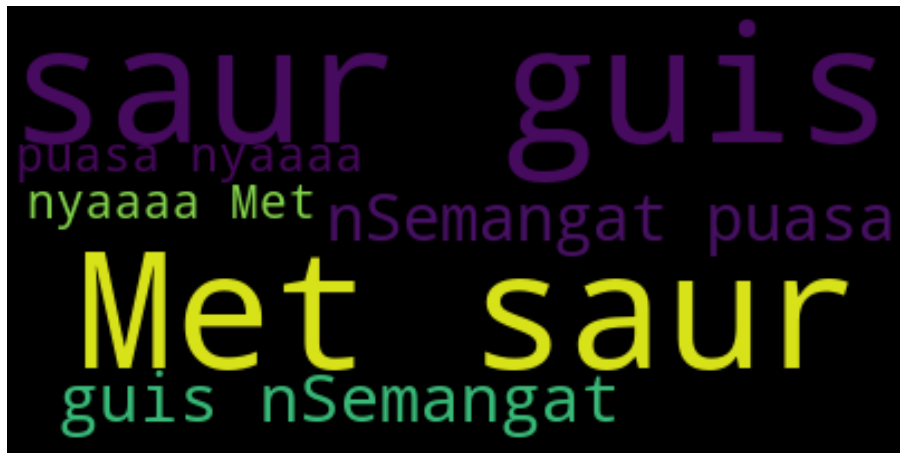

In [37]:
# Start with one review:
tweet_data = pw.text[90]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(tweet_data)
plt.figure(figsize = (16,16))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Problem - B

In [38]:
pw.to_json('new.json')

In [39]:
pw.nunique

<bound method DataFrame.nunique of     Unnamed: 0                     C_date                   Id  \
0            0  2021-12-15 20:14:30+00:00  1471212090002006026   
1            1  2021-12-15 20:14:03+00:00  1471211977951252482   
2            2  2021-12-15 20:13:10+00:00  1471211753673408515   
3            3  2021-12-15 20:12:06+00:00  1471211487221846019   
4            4  2021-12-15 20:11:35+00:00  1471211356619640833   
..         ...                        ...                  ...   
95          95  2021-12-15 19:16:04+00:00  1471197384931561473   
96          96  2021-12-15 19:15:29+00:00  1471197236566663175   
97          97  2021-12-15 19:15:25+00:00  1471197221433618437   
98          98  2021-12-15 19:14:13+00:00  1471196919523274753   
99          99  2021-12-15 19:13:59+00:00  1471196861029654538   

                                               U_name  \
0   User(_api=<tweepy.api.API object at 0x0000029C...   
1   User(_api=<tweepy.api.API object at 0x0000029C...   
2

### Problem - C

In [40]:
from textblob import TextBlob

def sentiment(text):
    return TextBlob(text).sentiment.subjectivity

def polarity(text):
    return TextBlob(text).sentiment.polarity

pw['sentiment']= pw['text'].apply(sentiment)
pw['polarity']= pw['text'].apply(polarity)



In [44]:
x=10
y=20
z=40

def sentiment_analysis(x):
    if x < 0:
        return 'Negative'
    elif y > 0:
        return 'Positive'
    elif z == 0:
        return 'Null'
        
pw['sentiment_analysis'] = pw['polarity'].apply(sentiment_analysis)
pw

,Unnamed: 0,C_date,Id,U_name,text,source,mention,retweet,sentiment,polarity,sentiment_analysis
0,0,2021-12-15 20:14:30+00:00,1471212090002006026,User(_api=<tweepy.api.API object at 0x0000029C...,['RT Eat clean berlaku bila\n\n1 Kurangkan gu...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",94,0.675,0.358333,Positive
1,1,2021-12-15 20:14:03+00:00,1471211977951252482,User(_api=<tweepy.api.API object at 0x0000029C...,['RT Saling mengingatkan aja ya kita Kalau ma...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",2349,0.000,0.000000,Positive
2,2,2021-12-15 20:13:10+00:00,1471211753673408515,User(_api=<tweepy.api.API object at 0x0000029C...,"[' Ayam penyet', ' Ayam penyet', ' Ayam penyet...",Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.000,0.000000,Positive
3,3,2021-12-15 20:12:06+00:00,1471211487221846019,User(_api=<tweepy.api.API object at 0x0000029C...,[' Reneo omahku nder dimasakno simbahku jangan...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.000,0.000000,Positive
4,4,2021-12-15 20:11:35+00:00,1471211356619640833,User(_api=<tweepy.api.API object at 0x0000029C...,"[' Suka yg kecil²', ' Suka yg kecil²', ' Suka ...",Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.000,0.000000,Positive
...,...,...,...,...,...,...,...,...,...,...,...
95,95,2021-12-15 19:16:04+00:00,1471197384931561473,User(_api=<tweepy.api.API object at 0x0000029C...,"[' masak aja udahhh gas', ' masak aja udahhh g...",Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.000,0.000000,Positive
96,96,2021-12-15 19:15:29+00:00,1471197236566663175,User(_api=<tweepy.api.API object at 0x0000029C...,['RT Nimekula food ya 80 pale kibandaski madh...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",144,0.180,-0.210000,Negative
97,97,2021-12-15 19:15:25+00:00,1471197221433618437,User(_api=<tweepy.api.API object at 0x0000029C...,[' Chandigarh punjabiya chandigarh haryana da...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.000,0.000000,Positive
98,98,2021-12-15 19:14:13+00:00,1471196919523274753,User(_api=<tweepy.api.API object at 0x0000029C...,['WOWOQOOWWW KAEYA TEMBUS 4K NO FOOD BUFF KAGE...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.000,0.000000,Positive


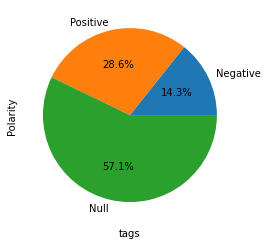

In [42]:
import matplotlib.pyplot as plt

#Plotting graphs
plt.xlabel("tags")
plt.ylabel("Polarity")
plt.pie([x,y,z],labels = ['Negative','Positive', 'Null'], autopct = "%1.1f%%")
plt.show()